In [1]:
import folium as fo
import modin.pandas as pd
import seaborn as sn

from datetime import datetime

In [2]:
static = pd.read_csv('data/ais_data/nari_static.csv')
dynamic = pd.read_csv('data/ais_data/nari_dynamic.csv', nrows=2_000_000) # not enough RAM to use whole file

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()



Columns of interest:

STATIC
- sourcemmsi: ID of the boat
- eta: estimated time arrival
- destination: indicated destination port
- t: timestamp

DYNAMIC
- sourcemmsi
- t
- lon: longitude
- lat: latitude
- rate

In [ ]:
# TODO: join the two dataframe on sourcemmsi + t

In [17]:
MMSI = 245257000

In [18]:
dynamic[static.sourcemmsi == MMSI]

sourcemmsi  navigationalstatus  rateofturn  speedoverground  \
6        227415000                  15        -127             11.4   
22       228854000                  15           0             10.4   
37       227705102                  15        -127              0.1   
51       227443000                  15        -127             11.4   
63       228051000                   0        -127              0.0   
...            ...                 ...         ...              ...   
110811   276700000                   0           0             10.7   
110835   228064900                   0           0             11.8   
111069   228017700                   0           0             14.0   
111825   259019000                   0           0             14.4   
113453   227705102                  15        -127              0.0   

        courseoverground  trueheading       lon        lat           t  
6                  176.5          511 -4.769152  47.987152  1443650409  
22                 268.0          270 -4.349248  48.117874  1443650428  
37                 275.0          511 -4.496580  48.382435  1443650444  
51                 171.1          511 -4.782132  48.003067  1443650460  
63                 291.6          511 -4.485095  48.381340  1443650474  
...                  ...          ...       ...        ...         ...  
110811              85.8           83 -4.640439  48.319923  1443773119  
110835             245.8          245 -4.741803  48.294067  1443773134  
111069             295.5          303 -4.878930  48.388775  1443773287  
111825              83.5           80 -4.599563  48.321053  1443773830  
113453             267.8          511 -4.495360  48.383667  1443775209  

[364 rows x 9 columns]

### Display the positions of a boat

In [26]:
df = dynamic[static.sourcemmsi == MMSI]

m = fo.Map(location=[47.98715, -4.769152], zoom_start=8)
for i in range(len(df)):
    fo.Circle(location=[df.iloc[i]['lat'],
                        df.iloc[i]['lon']]
             ).add_to(m)
m

In [3]:
joined_df = static.join(dynamic.set_index(['sourcemmsi', 't']), on=['sourcemmsi', 't'], how='inner')

To request implementation, send an email to feature_requests@modin.org.


<AxesSubplot:ylabel='Count'>

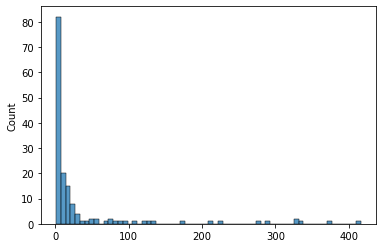

In [11]:
sn.histplot(joined_df.groupby('sourcemmsi').t.count().tolist())

Let's remove the boats with less than a few timestamps (< 5)

In [12]:
mmsi_list = joined_df.groupby('sourcemmsi').t.count() > 10
mmsi_list = mmsi_list[mmsi_list].index

In [14]:
print(f'{len(mmsi_list)} bateaux')

63 bateaux


In [15]:
clean_boats = joined_df[joined_df.sourcemmsi.isin(mmsi_list)]

In [16]:
m = fo.Map(location=[47.98715, -4.769152], zoom_start=8)

for i in clean_boats.index.tolist():
    fo.Circle(location=[clean_boats.loc[i, 'lat'], clean_boats.loc[i, 'lon']],
              opacity=0.5,
              radius=100,
              tooltip=f'{clean_boats.loc[i, "destination"]} - {datetime.fromtimestamp(clean_boats.loc[i, "t"])}'
             ).add_to(m)
m

In [17]:
clean_boats.destination.unique().tolist()

[' ',
 'BREST ',
 'OUESSANT ',
 'PORTSMOUTH LH ',
 'RADE DE BREST ',
 'IJMUIDEN ',
 'ILE DE SEIN ',
 'PORTSMOUTH ',
 'DOUARNENEZ ',
 'DONGES ',
 'IROISE ',
 'CONCARNEAU ',
 'LESCONIL ',
 'DUNKIRK ',
 'ZONE DE PECHE ',
 'BREST FRANCE ',
 'SANTANDER ',
 'SEIN ',
 'DOUARNENEZ (FRANCE) ',
 'BILBAO ',
 'WORKING AREA ',
 'FISHIN CHANEL 13/16 ',
 'EN PECHE ',
 'BAIE DU STIFF ',
 'LEHAVRE ',
 'DUNKERQUE ',
 'RADE BREST ',
 'PEMBROKE ',
 'AMSTERDAM ',
 'DOUARNENEZ /FRANCE ',
 'BERTHEAUME ',
 'BRAKE ',
 'ES CAD>FR BES ',
 'MONTOIR ',
 'DOUARNENEZ(FRANCE) ',
 'CABLELAYING SEATRIAL ',
 'FR BES>FR BES ',
 'CHERBOURG ',
 'FOR ORDER ',
 'PASAJES ',
 'CAMARET ',
 'SOUND SYSTEM ',
 'CABLE WORK ',
 'MOLENE ',
 'SOUTHAMPTON ',
 'SAN CIPRIANO ',
 'ZONE PECHE ',
 'ATSEA ',
 'POINT.FORTIN ',
 'LE HAVRE ',
 'KIEL ',
 'ROUTE PECHE ',
 'OCEANOGRAPHIC WORKS ',
 nan]